Should work if you have done git clone https://github.com/desihub/LSS.git and edited the part appending to the path or just made sure you are in LSS/Sandbox


In [2]:
import sys, os, glob, time
import numpy as np
import matplotlib.pyplot as plt
import fitsio

In [3]:
sys.path.append('../py') #this works if you are in the Sandbox directory, check with os.getcwd()

In [4]:
from LSS.mkCat_singletile  import xitools

In [15]:
import subprocess

In [27]:
import importlib

In [36]:
importlib.reload(xitools) #this is just for when I developed the code during the notebook creation

<module 'LSS.mkCat_singletile.xitools' from '../py/LSS/mkCat_singletile/xitools.py'>

In [11]:
#directories for intermediate files
dirpcadw = os.environ['CSCRATCH']+'/pcadw/'
dirpc = os.environ['CSCRATCH']+'/paircounts/'
if not os.path.exists(dirpc):
    os.mkdir(dirpcadw)
if not os.path.exists(dirpc):
    os.mkdir(dirpc)

In [12]:
rmax = 10 # number of random files to use

In [13]:
tp='ELG'
tile = '80606'
night = 'deep'
zmin = 0.8
zmax=1.1
catdir = '/global/cfs/cdirs/desi/survey/catalogs/SV1/LSS/LSScats/v0/'
gf = xitools.createSourcesrd_ad(tp,tile,night,zmin=zmin,zmax=zmax,datadir=catdir)

995 data objects going out for paircounts
3169 random objects going out for paircounts


In [21]:
subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
subprocess.run('./dopc'+gf+'.sh')

CompletedProcess(args='./dopcgELG80606_deep_zm0.8zx1.1.sh', returncode=0)

In [24]:
#above did first random file, do the rest
for i in range(1,rmax):
    gf = xitools.createSourcesrd_ari(tp,tile,night,i,zmin=zmin,zmax=zmax,datadir=catdir)
    subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
    subprocess.run('./dopc'+gf+'.sh')
    

3200 random objects going out for paircounts
3157 random objects going out for paircounts
3156 random objects going out for paircounts
3157 random objects going out for paircounts
3092 random objects going out for paircounts
3109 random objects going out for paircounts
3100 random objects going out for paircounts
3028 random objects going out for paircounts
3243 random objects going out for paircounts


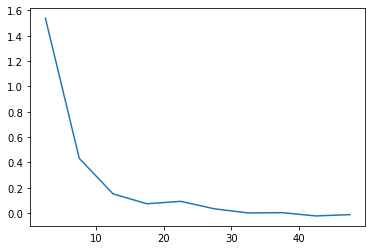

wrote results to xi0ELG80606_deep_zm0.8zx1.15st0.dat


array([ 1.5366768 ,  0.433039  ,  0.15283732,  0.07482333,  0.09376429,
        0.03483154,  0.00229998,  0.00457256, -0.02105441, -0.01085485],
      dtype=float32)

In [37]:
#calculates xi0, writes to cwd
xitools.ppxilcalc_LSDfjack_bs(tp,tile,night,zmin=zmin,zmax=zmax,bs=5,nran=rmax,wmu='')

In [39]:
#repeat for the rest of the ELG tiles (could have used all, 
#but with five tiles far apart, might as well go tile by tile)

824 data objects going out for paircounts
2700 random objects going out for paircounts
2563 random objects going out for paircounts
2712 random objects going out for paircounts
2647 random objects going out for paircounts
2592 random objects going out for paircounts
2630 random objects going out for paircounts
2657 random objects going out for paircounts
2637 random objects going out for paircounts
2576 random objects going out for paircounts
2690 random objects going out for paircounts


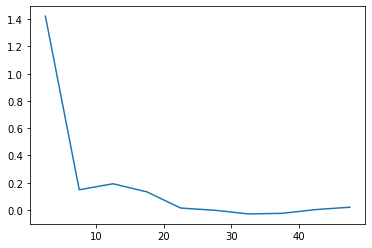

wrote results to xi0ELG80608_deep_zm0.8zx1.15st0.dat
920 data objects going out for paircounts
3008 random objects going out for paircounts
2943 random objects going out for paircounts
2938 random objects going out for paircounts
2954 random objects going out for paircounts
2916 random objects going out for paircounts
2884 random objects going out for paircounts
2769 random objects going out for paircounts
2937 random objects going out for paircounts
3048 random objects going out for paircounts
2957 random objects going out for paircounts


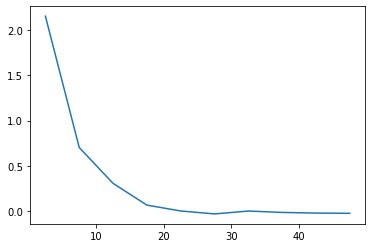

wrote results to xi0ELG80610_deep_zm0.8zx1.15st0.dat
882 data objects going out for paircounts
2780 random objects going out for paircounts
2753 random objects going out for paircounts
2785 random objects going out for paircounts
2815 random objects going out for paircounts
2838 random objects going out for paircounts
2772 random objects going out for paircounts
2796 random objects going out for paircounts
2834 random objects going out for paircounts
2770 random objects going out for paircounts
2816 random objects going out for paircounts


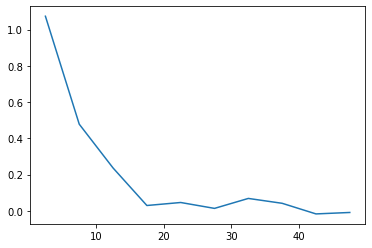

wrote results to xi0ELG80621_deep_zm0.8zx1.15st0.dat
730 data objects going out for paircounts
2322 random objects going out for paircounts
2371 random objects going out for paircounts
2477 random objects going out for paircounts
2380 random objects going out for paircounts
2295 random objects going out for paircounts
2430 random objects going out for paircounts
2400 random objects going out for paircounts
2334 random objects going out for paircounts
2315 random objects going out for paircounts
2374 random objects going out for paircounts


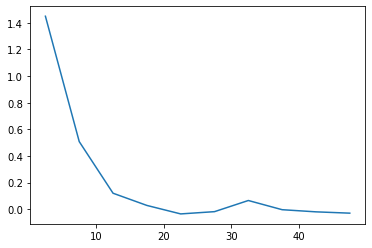

wrote results to xi0ELG80623_deep_zm0.8zx1.15st0.dat


In [40]:
tiles = ['80608','80610','80621','80623']
for tile in tiles:
    gf = xitools.createSourcesrd_ad(tp,tile,night,zmin=zmin,zmax=zmax,datadir=catdir)
    subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
    subprocess.run('./dopc'+gf+'.sh')
    for i in range(1,rmax):
        gf = xitools.createSourcesrd_ari(tp,tile,night,i,zmin=zmin,zmax=zmax,datadir=catdir)
        subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
        subprocess.run('./dopc'+gf+'.sh')
    xitools.ppxilcalc_LSDfjack_bs(tp,tile,night,zmin=zmin,zmax=zmax,bs=5,nran=rmax,wmu='')

In [35]:
bs=5
xidir=''
d1 = np.loadtxt(xidir+'xi0ELG80606_deep_zm0.8zx1.1'+str(bs)+'st0.dat').transpose() 
d2 = np.loadtxt(xidir+'xi0ELG80608_deep_zm0.8zx1.1'+str(bs)+'st0.dat').transpose()
d3 = np.loadtxt(xidir+'xi0ELG80610_deep_zm0.8zx1.1'+str(bs)+'st0.dat').transpose()
d4 = np.loadtxt(xidir+'xi0ELG80621_deep_zm0.8zx1.1'+str(bs)+'st0.dat').transpose()
d5 = np.loadtxt(xidir+'xi0ELG80623_deep_zm0.8zx1.1'+str(bs)+'st0.dat').transpose()
dme = (d1[1]+d2[1]+d3[1]+d4[1]+d5[1])/5. #just take mean    
eme = 0.5/np.sqrt(5)*((d1[1]-dme)**2.+(d2[1]-dme)**2.+(d3[1]-dme)**2.+(d4[1]-dme)**2.+(d5[1]-dme)**2.)**.5 #standard deviation

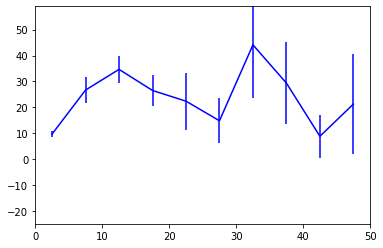

In [44]:
#check what this looks like
plt.errorbar(d1[0],(dme+0.02)*d1[0]**2.,eme*d1[0]**2.,fmt='-',color='b',label='0.8<z<1.1')
plt.xlim(0,50)
plt.ylim(-25,59)
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^2\xi_0$')
plt.show()

862 data objects going out for paircounts
2779 random objects going out for paircounts
2733 random objects going out for paircounts
2745 random objects going out for paircounts
2755 random objects going out for paircounts
2787 random objects going out for paircounts
2726 random objects going out for paircounts
2735 random objects going out for paircounts
2770 random objects going out for paircounts
2767 random objects going out for paircounts
2669 random objects going out for paircounts


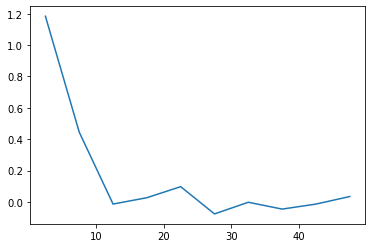

wrote results to xi0ELG80606_deep_zm1.1zx1.65st0.dat
747 data objects going out for paircounts
2237 random objects going out for paircounts
2345 random objects going out for paircounts
2381 random objects going out for paircounts
2342 random objects going out for paircounts
2385 random objects going out for paircounts
2406 random objects going out for paircounts
2328 random objects going out for paircounts
2354 random objects going out for paircounts
2358 random objects going out for paircounts
2351 random objects going out for paircounts


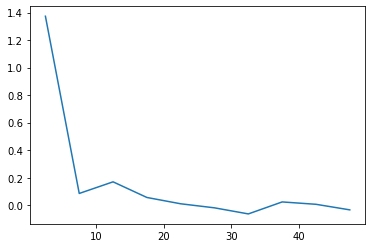

wrote results to xi0ELG80608_deep_zm1.1zx1.65st0.dat
771 data objects going out for paircounts
2419 random objects going out for paircounts
2368 random objects going out for paircounts
2492 random objects going out for paircounts
2462 random objects going out for paircounts
2497 random objects going out for paircounts
2547 random objects going out for paircounts
2382 random objects going out for paircounts
2445 random objects going out for paircounts
2399 random objects going out for paircounts
2448 random objects going out for paircounts


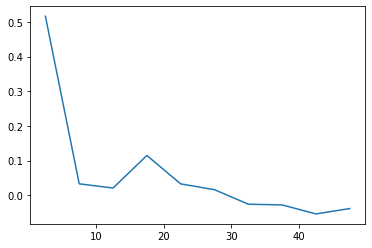

wrote results to xi0ELG80610_deep_zm1.1zx1.65st0.dat
695 data objects going out for paircounts
2228 random objects going out for paircounts
2207 random objects going out for paircounts
2183 random objects going out for paircounts
2269 random objects going out for paircounts
2287 random objects going out for paircounts
2193 random objects going out for paircounts
2166 random objects going out for paircounts
2172 random objects going out for paircounts
2133 random objects going out for paircounts
2209 random objects going out for paircounts


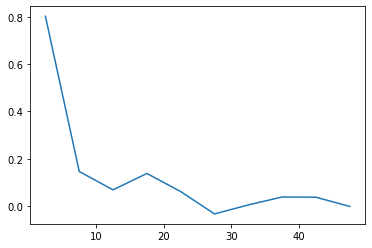

wrote results to xi0ELG80621_deep_zm1.1zx1.65st0.dat
667 data objects going out for paircounts
2117 random objects going out for paircounts
2119 random objects going out for paircounts
2149 random objects going out for paircounts
2122 random objects going out for paircounts
2253 random objects going out for paircounts
2191 random objects going out for paircounts
2202 random objects going out for paircounts
2173 random objects going out for paircounts
2131 random objects going out for paircounts
2217 random objects going out for paircounts


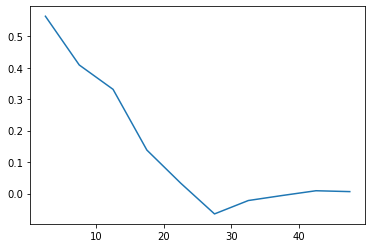

wrote results to xi0ELG80623_deep_zm1.1zx1.65st0.dat


In [45]:
#repeat for higher redshift range
zmin = 1.1
zmax = 1.6
tiles = ['80606','80608','80610','80621','80623']
for tile in tiles:
    gf = xitools.createSourcesrd_ad(tp,tile,night,zmin=zmin,zmax=zmax,datadir=catdir)
    subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
    subprocess.run('./dopc'+gf+'.sh')
    for i in range(1,rmax):
        gf = xitools.createSourcesrd_ari(tp,tile,night,i,zmin=zmin,zmax=zmax,datadir=catdir)
        subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
        subprocess.run('./dopc'+gf+'.sh')
    xitools.ppxilcalc_LSDfjack_bs(tp,tile,night,zmin=zmin,zmax=zmax,bs=5,nran=rmax,wmu='')

In [36]:
bs=5
xidir=''
d1 = np.loadtxt(xidir+'xi0ELG80606_deep_zm1.1zx1.6'+str(bs)+'st0.dat').transpose() 
d2 = np.loadtxt(xidir+'xi0ELG80608_deep_zm1.1zx1.6'+str(bs)+'st0.dat').transpose()
d3 = np.loadtxt(xidir+'xi0ELG80610_deep_zm1.1zx1.6'+str(bs)+'st0.dat').transpose()
d4 = np.loadtxt(xidir+'xi0ELG80621_deep_zm1.1zx1.6'+str(bs)+'st0.dat').transpose()
d5 = np.loadtxt(xidir+'xi0ELG80623_deep_zm1.1zx1.6'+str(bs)+'st0.dat').transpose()
dh = (d1[1]+d2[1]+d3[1]+d4[1]+d5[1])/5. #just take mean    
eh = 0.5/np.sqrt(5)*((d1[1]-dme)**2.+(d2[1]-dme)**2.+(d3[1]-dme)**2.+(d4[1]-dme)**2.+(d5[1]-dme)**2.)**.5 #standard deviation

3742 data objects going out for paircounts
11780 random objects going out for paircounts
11772 random objects going out for paircounts
11950 random objects going out for paircounts
11950 random objects going out for paircounts
12209 random objects going out for paircounts
12063 random objects going out for paircounts
11813 random objects going out for paircounts
11914 random objects going out for paircounts
11788 random objects going out for paircounts
11894 random objects going out for paircounts


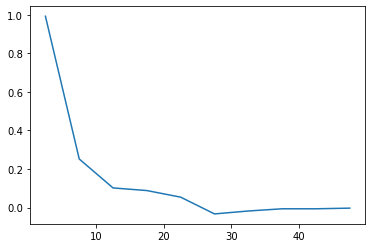

wrote results to xi0ELGalltiles_deep_zm1.1zx1.65st0.dat


array([ 0.99269664,  0.25191352,  0.10171105,  0.08814581,  0.05382847,
       -0.03308081, -0.01791456, -0.00646897, -0.0064632 , -0.00310062],
      dtype=float32)

In [55]:
#run the alltiles version to compare
tile = 'alltiles'
gf = xitools.createSourcesrd_ad(tp,tile,night,zmin=zmin,zmax=zmax,datadir=catdir)
subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
subprocess.run('./dopc'+gf+'.sh')
for i in range(1,rmax):
    gf = xitools.createSourcesrd_ari(tp,tile,night,i,zmin=zmin,zmax=zmax,datadir=catdir)
    subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
    subprocess.run('./dopc'+gf+'.sh')
xitools.ppxilcalc_LSDfjack_bs(tp,tile,night,zmin=zmin,zmax=zmax,bs=5,nran=rmax,wmu='')

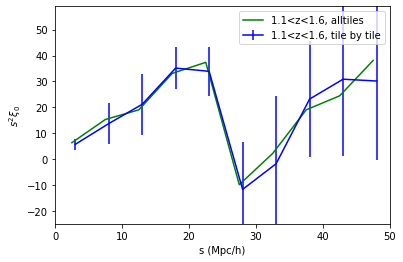

In [52]:
dha = np.loadtxt('xi0ELGalltiles_deep_zm1.1zx1.65st0.dat').transpose()
plt.errorbar(d1[0]+.5,(dh+0.02)*d1[0]**2.,eh*d1[0]**2.,fmt='-',color='b',label='1.1<z<1.6, tile by tile')
plt.plot(d[0],(dha[1]+0.02)*d[0]**2.,'-',color='g',label='1.1<z<1.6, alltiles')
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^2\xi_0$')
plt.xlim(0,50)
plt.ylim(-25,59)
plt.legend()
plt.show()

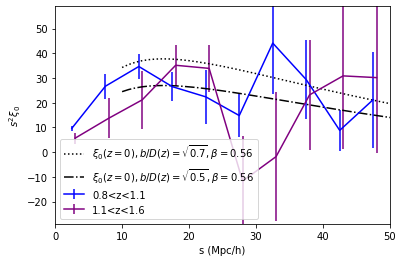

In [41]:
xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.563.04.07.015.00.dat').transpose()
plt.errorbar(d1[0],(dme+0.02)*d1[0]**2.,eme*d1[0]**2.,fmt='-',color='b',label='0.8<z<1.1')
plt.errorbar(d1[0]+.5,(dh+0.02)*d1[0]**2.,eh*d1[0]**2.,fmt='-',color='purple',label='1.1<z<1.6')
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.7,'k:',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.7},\beta=0.56$')
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.5,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.5},\beta=0.56$')
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^2\xi_0$')

plt.xlim(0,50)
plt.ylim(-29,59)
plt.legend()
plt.show()

Below looks at finer division in redshift to see if anything obvious pops out

0.6 0.8
1818 data objects going out for paircounts
5732 random objects going out for paircounts
5640 random objects going out for paircounts
5783 random objects going out for paircounts
5810 random objects going out for paircounts
5719 random objects going out for paircounts
5653 random objects going out for paircounts
5836 random objects going out for paircounts
5880 random objects going out for paircounts
5742 random objects going out for paircounts
5725 random objects going out for paircounts


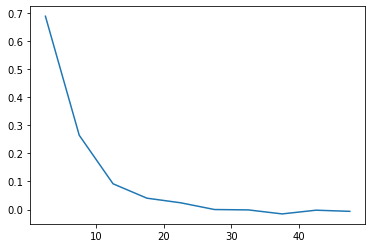

wrote results to xi0ELGalltiles_deep_zm0.6zx0.85st0.dat
0.8 1.0
3256 data objects going out for paircounts
10507 random objects going out for paircounts
10338 random objects going out for paircounts
10523 random objects going out for paircounts
10444 random objects going out for paircounts
10264 random objects going out for paircounts
10400 random objects going out for paircounts
10240 random objects going out for paircounts
10421 random objects going out for paircounts
10218 random objects going out for paircounts
10551 random objects going out for paircounts


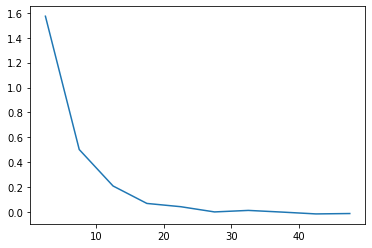

wrote results to xi0ELGalltiles_deep_zm0.8zx1.05st0.dat
1.0 1.2
1981 data objects going out for paircounts
6234 random objects going out for paircounts
6306 random objects going out for paircounts
6292 random objects going out for paircounts
6312 random objects going out for paircounts
6421 random objects going out for paircounts
6285 random objects going out for paircounts
6336 random objects going out for paircounts
6225 random objects going out for paircounts
6338 random objects going out for paircounts
6347 random objects going out for paircounts


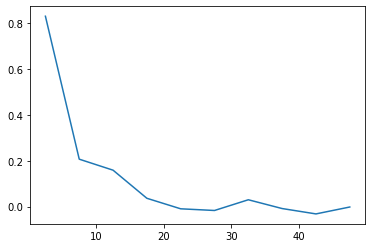

wrote results to xi0ELGalltiles_deep_zm1.0zx1.25st0.dat
1.2 1.4
1475 data objects going out for paircounts
4648 random objects going out for paircounts
4545 random objects going out for paircounts
4812 random objects going out for paircounts
4700 random objects going out for paircounts
4779 random objects going out for paircounts
4795 random objects going out for paircounts
4585 random objects going out for paircounts
4778 random objects going out for paircounts
4682 random objects going out for paircounts
4782 random objects going out for paircounts


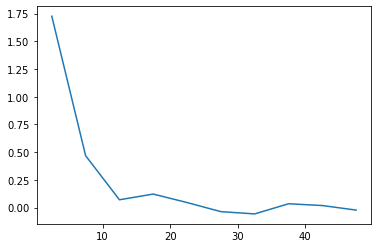

wrote results to xi0ELGalltiles_deep_zm1.2zx1.45st0.dat
1.4 1.6
1381 data objects going out for paircounts
4370 random objects going out for paircounts
4413 random objects going out for paircounts
4392 random objects going out for paircounts
4446 random objects going out for paircounts
4543 random objects going out for paircounts
4391 random objects going out for paircounts
4383 random objects going out for paircounts
4332 random objects going out for paircounts
4287 random objects going out for paircounts
4294 random objects going out for paircounts


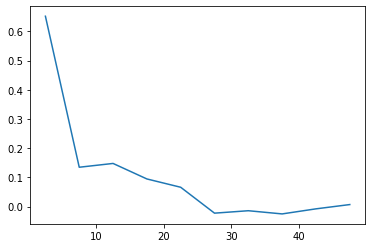

wrote results to xi0ELGalltiles_deep_zm1.4zx1.65st0.dat


In [51]:
tile = 'alltiles'
zms = [0.6,.8,1.,1.2,1.4]
for zmin in zms:
    zmax = round(zmin + 0.2,1)
    print(zmin,zmax)
    gf = xitools.createSourcesrd_ad(tp,tile,night,zmin=zmin,zmax=zmax,datadir=catdir)
    subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
    subprocess.run('./dopc'+gf+'.sh')
    for i in range(1,rmax):
        gf = xitools.createSourcesrd_ari(tp,tile,night,i,zmin=zmin,zmax=zmax,datadir=catdir)
        subprocess.run(['chmod','+x','dopc'+gf+'.sh'])
        subprocess.run('./dopc'+gf+'.sh')
    xitools.ppxilcalc_LSDfjack_bs(tp,tile,night,zmin=zmin,zmax=zmax,bs=5,nran=rmax,wmu='')

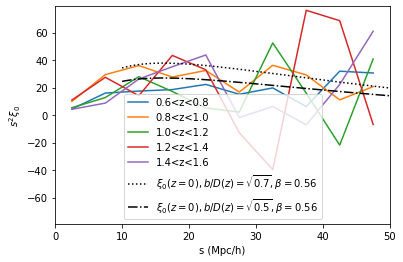

In [53]:
d1 = np.loadtxt('xi0ELGalltiles_deep_zm0.6zx0.85st0.dat').transpose()
d2 = np.loadtxt('xi0ELGalltiles_deep_zm0.8zx1.05st0.dat').transpose()
d3 = np.loadtxt('xi0ELGalltiles_deep_zm1.0zx1.25st0.dat').transpose()
d4 = np.loadtxt('xi0ELGalltiles_deep_zm1.2zx1.45st0.dat').transpose()
d5 = np.loadtxt('xi0ELGalltiles_deep_zm1.4zx1.65st0.dat').transpose()
plt.plot(d1[0],(d1[1]+0.02)*d1[0]**2.,label='0.6<z<0.8')
plt.plot(d1[0],(d2[1]+0.02)*d1[0]**2.,label='0.8<z<1.0')
plt.plot(d1[0],(d3[1]+0.02)*d1[0]**2.,label='1.0<z<1.2')
plt.plot(d1[0],(d4[1]+0.02)*d1[0]**2.,label='1.2<z<1.4')
plt.plot(d1[0],(d5[1]+0.02)*d1[0]**2.,label='1.4<z<1.6')
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.7,'k:',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.7},\beta=0.56$')
plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.5,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.5},\beta=0.56$')
plt.xlabel('s (Mpc/h)')
plt.ylabel(r'$s^2\xi_0$')

plt.xlim(0,50)
plt.ylim(-79,79)
plt.legend()
plt.show()